### import modules

In [104]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from collections import Counter

from scipy import stats

import pickle

# set style
plt.style.use('seaborn')

### import data

In [105]:
data = pd.read_csv('/Users/silvanwehrli/Documents/Universität/FS21/Advanced Software Engineering/Project/modeling/listings_Berlin_2020_01_20.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20200110222913,2020-01-11,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,f,f,strict_14_with_grace_period,f,f,6,6,0,0,2.84
1,3176,https://www.airbnb.com/rooms/3176,20200110222913,2020-01-11,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.13
2,3309,https://www.airbnb.com/rooms/3309,20200110222913,2020-01-11,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.35
3,6883,https://www.airbnb.com/rooms/6883,20200110222913,2020-01-11,Stylish East Side Loft in Center with AC & 2 b...,NaN,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,none,The emerging and upcoming East of the new hip ...,...,f,f,moderate,f,t,1,1,0,0,1.09
4,7071,https://www.airbnb.com/rooms/7071,20200110222913,2020-01-11,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,f,f,moderate,f,f,2,0,2,0,2.19


In [107]:
data.shape

(25349, 106)

#### Which attributes have missing values?

In [108]:
missing_vals = (data.isna().sum()/len(data)).sort_values(ascending=False)

In [109]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_vals)

jurisdiction_names                              1.000000
host_acceptance_rate                            1.000000
xl_picture_url                                  1.000000
medium_url                                      1.000000
thumbnail_url                                   1.000000
square_feet                                     0.983195
monthly_price                                   0.911081
license                                         0.893487
weekly_price                                    0.876563
notes                                           0.684958
access                                          0.550515
host_about                                      0.505819
interaction                                     0.499625
house_rules                                     0.495049
host_response_time                              0.453430
host_response_rate                              0.453430
neighborhood_overview                           0.439110
security_deposit               

#### What are the types of the attributes?

In [110]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

#### some examples...

#### neighbourhood

In [111]:
data.neighbourhood_cleansed.unique()

array(['Brunnenstr. Süd', 'Prenzlauer Berg Südwest', 'Schöneberg-Nord',
       'Frankfurter Allee Süd FK', 'Helmholtzplatz',
       'Prenzlauer Berg Nordwest', 'nördliche Luisenstadt',
       'Reuterstraße', 'südliche Luisenstadt', 'Tempelhofer Vorstadt',
       'Prenzlauer Berg Süd', 'Moabit Ost', 'Otto-Suhr-Allee',
       'Schillerpromenade', 'Alt  Treptow', 'Alexanderplatz',
       'Neue Kantstraße', 'Ostpreußendamm',
       'Schmöckwitz/Karolinenhof/Rauchfangswerder',
       'Neuköllner Mitte/Zentrum', 'Frankfurter Allee Nord',
       'Prenzlauer Berg Nord', 'Kantstraße', 'Schmargendorf',
       'Regierungsviertel', 'Kurfürstendamm', 'Schöneberg-Süd',
       'Blankenfelde/Niederschönhausen', 'Halensee',
       'Südliche Friedrichstadt', 'Moabit West', 'Wiesbadener Straße',
       'West 3', 'Rixdorf', 'Neu Lichtenberg',
       'Blankenburg/Heinersdorf/Märchenland', 'Friedenau',
       'Brunnenstr. Nord', 'Ost 2', 'Volkspark Wilmersdorf',
       'Pankow Zentrum', 'Osloer Straße', 'Dr

<AxesSubplot:>

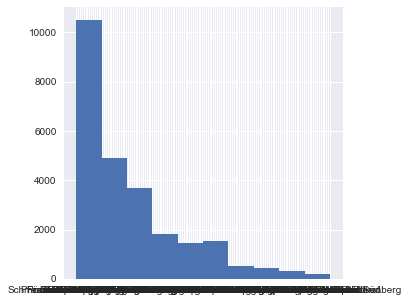

In [112]:
data.neighbourhood_cleansed.hist(figsize=(5, 5))

#### room_type

<AxesSubplot:>

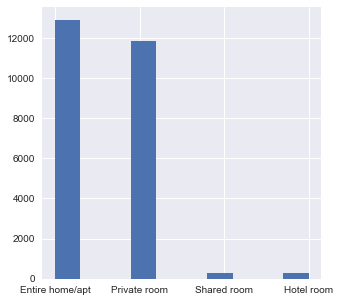

In [113]:
data.room_type.hist(figsize=(5, 5))

In [114]:
data.room_type.isna().sum()

0

#### property_type

<AxesSubplot:>

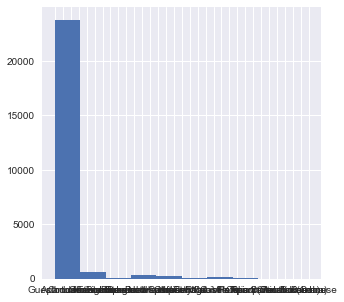

In [115]:
data.property_type.hist(figsize=(5, 5))

In [116]:
data.property_type.isna().sum()

0

#### bedrooms

<AxesSubplot:>

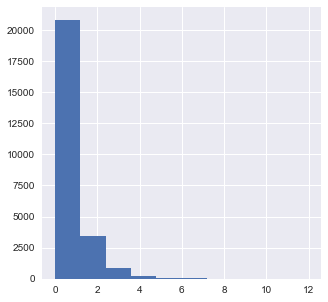

In [117]:
data.bedrooms.hist(figsize=(5, 5))

In [118]:
data.bedrooms.isna().sum()

32

#### bathrooms

<AxesSubplot:>

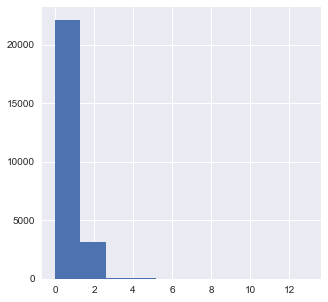

In [119]:
data.bathrooms.hist(figsize=(5, 5))

In [120]:
data.bathrooms.isna().sum()

20

#### guests_included

<AxesSubplot:>

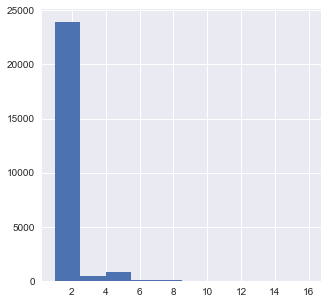

In [121]:
data.guests_included.hist(figsize=(5, 5))

In [122]:
data.guests_included.isna().sum()

0

#### price

In [123]:
data.price

0         $60.00
1         $90.00
2         $28.00
3        $125.00
4         $33.00
          ...   
25344    $260.00
25345     $18.00
25346     $26.00
25347     $17.00
25348     $26.00
Name: price, Length: 25349, dtype: object

#### let's clean this right away

In [124]:
data.price = data.price.map(lambda x: float(x[1:].replace(',', '')))

In [125]:
data.price.describe()

count    25349.000000
mean        72.995818
std        217.433163
min          0.000000
25%         34.000000
50%         50.000000
75%         79.000000
max       9000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

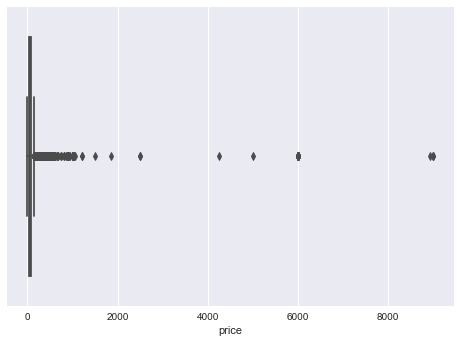

In [126]:
sns.boxplot(x=data['price'])

### Feature selection / filtering

#### remove all attributes with more than 10% missing values

In [127]:
data = data.drop(columns=missing_vals[missing_vals>0.1].index)

In [128]:
data.shape

(25349, 74)

#### What's left?

In [129]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'description', 'experiences_offered', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_a

some promising columns are selected

In [130]:
sel_columns = [
    'price', # target
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'bathrooms',
    'bedrooms',
    'accommodates',
    'guests_included',
    'amenities'
]

In [131]:
data.neighbourhood_cleansed.unique()

array(['Brunnenstr. Süd', 'Prenzlauer Berg Südwest', 'Schöneberg-Nord',
       'Frankfurter Allee Süd FK', 'Helmholtzplatz',
       'Prenzlauer Berg Nordwest', 'nördliche Luisenstadt',
       'Reuterstraße', 'südliche Luisenstadt', 'Tempelhofer Vorstadt',
       'Prenzlauer Berg Süd', 'Moabit Ost', 'Otto-Suhr-Allee',
       'Schillerpromenade', 'Alt  Treptow', 'Alexanderplatz',
       'Neue Kantstraße', 'Ostpreußendamm',
       'Schmöckwitz/Karolinenhof/Rauchfangswerder',
       'Neuköllner Mitte/Zentrum', 'Frankfurter Allee Nord',
       'Prenzlauer Berg Nord', 'Kantstraße', 'Schmargendorf',
       'Regierungsviertel', 'Kurfürstendamm', 'Schöneberg-Süd',
       'Blankenfelde/Niederschönhausen', 'Halensee',
       'Südliche Friedrichstadt', 'Moabit West', 'Wiesbadener Straße',
       'West 3', 'Rixdorf', 'Neu Lichtenberg',
       'Blankenburg/Heinersdorf/Märchenland', 'Friedenau',
       'Brunnenstr. Nord', 'Ost 2', 'Volkspark Wilmersdorf',
       'Pankow Zentrum', 'Osloer Straße', 'Dr

In [132]:
data[sel_columns].corr()

,price,bathrooms,bedrooms,accommodates,guests_included
price,1.000000,0.059776,0.105354,0.129288,0.114540
bathrooms,0.059776,1.000000,0.327807,0.272609,0.193890
bedrooms,0.105354,0.327807,1.000000,0.631698,0.398721
accommodates,0.129288,0.272609,0.631698,1.000000,0.544631
guests_included,0.114540,0.193890,0.398721,0.544631,1.000000


#### now let's have a closer look at amenities

In [133]:
data.amenities.iloc[0]

'{TV,"Cable TV",Wifi,Kitchen,Gym,"Free street parking",Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Lockbox,"Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}'

... so it's some sort of a list

In [134]:
[d for d in data.amenities.iloc[0][1:-1].split(',')]

['TV',
 '"Cable TV"',
 'Wifi',
 'Kitchen',
 'Gym',
 '"Free street parking"',
 'Heating',
 '"Family/kid friendly"',
 '"Smoke detector"',
 'Essentials',
 'Shampoo',
 '"Lock on bedroom door"',
 'Hangers',
 '"Hair dryer"',
 'Iron',
 '"Laptop friendly workspace"',
 '"Self check-in"',
 'Lockbox',
 '"Private living room"',
 'Bathtub',
 '"Hot water"',
 '"Bed linens"',
 '"Extra pillows and blankets"',
 'Microwave',
 '"Coffee maker"',
 'Refrigerator',
 'Dishwasher',
 '"Dishes and silverware"',
 '"Cooking basics"',
 'Stove',
 '"Luggage dropoff allowed"',
 '"Long term stays allowed"']

so then let's try to find out what the most used amenities are

In [135]:
amenities = [a for d in data.amenities.tolist() for a in d[1:-1].split(',')]

In [136]:
amenities_counter = Counter(amenities)

In [137]:
len(amenities_counter)

178

In [138]:
amenities_counter.most_common()

[('Wifi', 24241),
 ('Heating', 23990),
 ('Kitchen', 23756),
 ('Essentials', 23197),
 ('Washer', 20587),
 ('"Hair dryer"', 17568),
 ('"Laptop friendly workspace"', 16784),
 ('Hangers', 16540),
 ('Iron', 13372),
 ('"Hot water"', 12771),
 ('Shampoo', 12380),
 ('TV', 11547),
 ('"Smoke detector"', 9655),
 ('"Dishes and silverware"', 9582),
 ('Refrigerator', 9532),
 ('"Cooking basics"', 8570),
 ('Stove', 8395),
 ('"Bed linens"', 7593),
 ('Oven', 7543),
 ('"Family/kid friendly"', 6946),
 ('Internet', 6904),
 ('"Coffee maker"', 6868),
 ('"Lock on bedroom door"', 6618),
 ('"Free street parking"', 6486),
 ('"Host greets you"', 6039),
 ('Elevator', 5648),
 ('"Buzzer/wireless intercom"', 5352),
 ('Dishwasher', 5297),
 ('"First aid kit"', 4901),
 ('"Smoking allowed"', 4660),
 ('"Patio or balcony"', 4152),
 ('Dryer', 4095),
 ('"Private entrance"', 4013),
 ('Microwave', 3968),
 ('"Long term stays allowed"', 3943),
 ('"Fire extinguisher"', 3862),
 ('"Extra pillows and blankets"', 3859),
 ('"Cable TV"'

What should we include? Let's get a feeling for the correlation with regard to price

In [139]:
data_amenities = data.copy()

In [140]:
for d in amenities_counter:
    data_amenities[d] = 0

In [141]:
for i, row in data_amenities.iterrows():
    for d in amenities_counter:
        if d in row['amenities']:
            data_amenities.at[i, d] = 1

In [142]:
amenities_corr = []
for a in amenities_counter:
    amenities_corr.append( (a, stats.pointbiserialr(data_amenities[a], data_amenities['price'])) )

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [143]:
amenities_corr.sort(key=lambda tup: tup[1].correlation, reverse=True)

In [144]:
amenities_corr

[('Gym',
  PointbiserialrResult(correlation=0.2290183272429663, pvalue=6.463713276588153e-299)),
 ('"Air conditioning"',
  PointbiserialrResult(correlation=0.1868284237205083, pvalue=7.543670131309699e-198)),
 ('Elevator',
  PointbiserialrResult(correlation=0.10180783373913233, pvalue=2.210491140486913e-59)),
 ('TV',
  PointbiserialrResult(correlation=0.09612685655390006, pvalue=4.16461344764714e-53)),
 ('"Fire extinguisher"',
  PointbiserialrResult(correlation=0.06902332353035254, pvalue=3.7358903250203155e-28)),
 ('"Bed linens"',
  PointbiserialrResult(correlation=0.05945432956321725, pvalue=2.6969619878083848e-21)),
 ('"High chair"',
  PointbiserialrResult(correlation=0.052611761917644405, pvalue=5.207794241014893e-17)),
 ('Shampoo',
  PointbiserialrResult(correlation=0.052594811242938314, pvalue=5.328840570454117e-17)),
 ('"Pack ’n Play/travel crib"',
  PointbiserialrResult(correlation=0.05070633061053491, pvalue=6.586982754316611e-16)),
 ('Crib',
  PointbiserialrResult(correlation

now let's go with Gym, Air conditioning and Elevator for the moment

In [145]:
sel_amenities = ['Gym', '"Air conditioning"', 'Elevator']

In [146]:
data[sel_amenities] = data_amenities[sel_amenities]

In [147]:
sel_columns.remove('amenities')

In [148]:
sel_columns += sel_amenities

In [149]:
sel_columns

['price',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms',
 'bedrooms',
 'accommodates',
 'guests_included',
 'Gym',
 '"Air conditioning"',
 'Elevator']

### Training a neural network

#### Some preprocessing

In [150]:
data_net = data[sel_columns]

In [151]:
data_net.dtypes

price                     float64
neighbourhood_cleansed     object
property_type              object
room_type                  object
bathrooms                 float64
bedrooms                  float64
accommodates                int64
guests_included             int64
Gym                         int64
"Air conditioning"          int64
Elevator                    int64
dtype: object

three categorical variables left... turn them into dummies

neighbourhood

In [152]:
neighbourhood_encoder = LabelBinarizer()

In [153]:
neighbourhood_encoder.fit(data_net['neighbourhood_cleansed'])

LabelBinarizer()

In [154]:
transformed = neighbourhood_encoder.transform(data_net['neighbourhood_cleansed'])

In [155]:
ohe_df = pd.DataFrame(transformed, columns=neighbourhood_encoder.classes_)

In [156]:
data_net = pd.concat([data_net, ohe_df], axis=1).drop(['neighbourhood_cleansed'], axis=1)

property_type

In [157]:
property_type_encoder = LabelBinarizer()

In [158]:
property_type_encoder.fit(data_net['property_type'])

LabelBinarizer()

In [159]:
transformed = property_type_encoder.transform(data_net['property_type'])

In [160]:
ohe_df = pd.DataFrame(transformed, columns=property_type_encoder.classes_)

In [161]:
data_net = pd.concat([data_net, ohe_df], axis=1).drop(['property_type'], axis=1)

room_type

In [162]:
room_type_encoder = LabelBinarizer()

In [163]:
room_type_encoder.fit(data_net['room_type'])

LabelBinarizer()

In [164]:
transformed = room_type_encoder.transform(data_net['room_type'])

In [165]:
ohe_df = pd.DataFrame(transformed, columns=room_type_encoder.classes_)

In [166]:
data_net = pd.concat([data_net, ohe_df], axis=1).drop(['room_type'], axis=1)

In [167]:
data_net.isna().sum().sort_values(ascending=False)

bedrooms          32
bathrooms         20
Teltower Damm      0
Schloßstr.         0
Schmargendorf      0
                  ..
Karlshorst         0
Karow              0
Kaulsdorf          0
Kurfürstendamm     0
Shared room        0
Length: 183, dtype: int64

and also some missing values

In [168]:
# replace with mean
data_net['bathrooms'].fillna((data_net['bathrooms'].mean()), inplace=True)
data_net['bedrooms'].fillna((data_net['bedrooms'].mean()), inplace=True)

In [169]:
train_net = data_net.sample(frac=0.8, random_state=0)
test_net = data_net.drop(train_net.index)

#### Do we need to normalize the input features?

In [171]:
train_net.describe().transpose()[['mean', 'std']]

,mean,std
price,73.086987,215.074421
bathrooms,1.104396,0.367381
bedrooms,1.163959,0.672560
accommodates,2.689876,1.576197
guests_included,1.357315,0.880437
...,...,...
Villa,0.000937,0.030596
Entire home/apt,0.512007,0.499868
Hotel room,0.011539,0.106801
Private room,0.464027,0.498717


In [172]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 50])
    plt.xlabel('Epoch')
    plt.ylabel('Error [price]')
    plt.legend()
    plt.grid(True)

In [173]:
net = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

net.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.001))

In [174]:
%%time
history = net.fit(
    train_net.drop(columns=['price'], axis=1), train_net['price'],
    validation_split=0.2,
    verbose=0, epochs=200)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

CPU times: user 1min 58s, sys: 1min 7s, total: 3min 5s
Wall time: 1min 5s


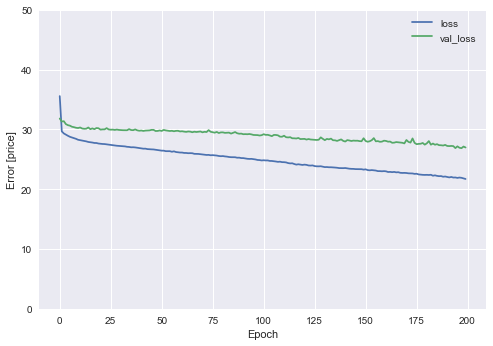

In [175]:
plot_loss(history)

In [176]:
net_pred = net.predict(test_net.drop(columns=['price'], axis=1))

In [177]:
np.sqrt(metrics.mean_squared_error(test_net['price'], net_pred))

167.76043200336693

#### Now let's save the model

In [179]:
!mkdir -p models

In [180]:
net.save('models/airbnb_price_net/1')

INFO:tensorflow:Assets written to: models/airbnb_price_net/1/assets


#### And also save the label encoders

In [257]:
!mkdir -p ../api/code/encoders/airbnb_price_net/1/

In [258]:
with open('../api/code/encoders/airbnb_price_net/1/neighbourhood_encoder.pickle', 'wb') as f: 
    pickle.dump(neighbourhood_encoder, f)

In [259]:
with open('../api/code/encoders/airbnb_price_net/1/property_type_encoder.pickle', 'wb') as f: 
    pickle.dump(property_type_encoder, f)

In [260]:
with open('../api/code/encoders/airbnb_price_net/1/room_type_encoder.pickle', 'wb') as f: 
    pickle.dump(room_type_encoder, f)

#### To load the model, do the following:

In [181]:
model_path = 'models/airbnb_price_net/1'

In [182]:
new_net = tf.keras.models.load_model(model_path)

In [183]:
new_net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  11712     
_________________________________________________________________
dense_4 (Dense)              multiple                  4160      
_________________________________________________________________
dense_5 (Dense)              multiple                  65        
Total params: 15,937
Trainable params: 15,937
Non-trainable params: 0
_________________________________________________________________


In [184]:
new_net.predict([[0]*182])

array([[16.716515]], dtype=float32)

### preprocessing pipeline

as it can be used in the backend to process a post request

In [207]:
len(list(train_net.columns))

183

so in order to make a prediction we need to make sure that attributes are correctly ordered, so let's have a look at the ordering

In [208]:
list(train_net.columns)

['price',
 'bathrooms',
 'bedrooms',
 'accommodates',
 'guests_included',
 'Gym',
 '"Air conditioning"',
 'Elevator',
 'Adlershof',
 'Albrechtstr.',
 'Alexanderplatz',
 'Allende-Viertel',
 'Alt  Treptow',
 'Alt-Hohenschönhausen Nord',
 'Alt-Hohenschönhausen Süd',
 'Alt-Lichtenberg',
 'Altglienicke',
 'Altstadt-Kietz',
 'Barstraße',
 'Baumschulenweg',
 'Biesdorf',
 'Blankenburg/Heinersdorf/Märchenland',
 'Blankenfelde/Niederschönhausen',
 'Bohnsdorf',
 'Britz',
 'Brunnenstr. Nord',
 'Brunnenstr. Süd',
 'Brunsbütteler Damm',
 'Buch',
 'Buchholz',
 'Buckow',
 'Buckow Nord',
 'Charlottenburg Nord',
 'Dammvorstadt',
 'Drakestr.',
 'Düsseldorfer Straße',
 'Falkenhagener Feld',
 'Fennpfuhl',
 'Forst Grunewald',
 'Frankfurter Allee Nord',
 'Frankfurter Allee Süd',
 'Frankfurter Allee Süd FK',
 'Friedenau',
 'Friedrichsfelde Nord',
 'Friedrichsfelde Süd',
 'Friedrichshagen',
 'Gatow / Kladow',
 'Gropiusstadt',
 'Grunewald',
 'Grünau',
 'Hakenfelde',
 'Halensee',
 'Haselhorst',
 'Heerstrasse',
 

so the list of features for making a prediction must be composed the following way:
1. bathrooms [integer]
2. bedrooms [integer]
2. accommodates [integer]
3. guests_included [integer]
4. Gym [binary]
5. Air conditioning [binary]
6. Elevator [binary]
7. Neighbourhood --> use the encoder!
8. Property type --> use the encoder!
9. Room type --> use the encoder!

an example

In [246]:
bathrooms = 2
bedrooms = 2
accommodates = 2
guests_included = 2
gym = 1
ac = 0
elevator = 1
neighbourhood = neighbourhood_encoder.transform(['Mitte'])
property_type = property_type_encoder.transform(['House'])
room_type = room_type_encoder.transform(['Hotel Room'])

In [226]:
neighbourhood[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [247]:
pred_features = [bathrooms, bedrooms, accommodates, guests_included, gym, ac, elevator]

In [248]:
pred_features = pred_features + neighbourhood.tolist()[0] + property_type.tolist()[0] + room_type.tolist()[0]

In [249]:
net.predict([pred_features])

array([[185.07687]], dtype=float32)